# Problem 3
**import libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime, timedelta
from sklearn.cluster import KMeans

**load the data**

In [2]:
df=pd.read_parquet(r"C:\Users\Barry\Desktop\projects\akaike assignment\Structured_Data_Assignment\Structured_Data_Assignment\train.parquet")

In [3]:
df.head(3)

,Patient-Uid,Date,Incident
0,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2019-03-09,PRIMARY_DIAGNOSIS
1,a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f,2015-05-16,PRIMARY_DIAGNOSIS
3,a0dc94c6-1c7c-11ec-a3a0-16262ee38c7f,2018-01-30,SYMPTOM_TYPE_0


In [4]:
# Filter the dataframe to only include rows where the drug is the "Target Drug"
target_drug = df[df['Incident'] == 'TARGET DRUG']

In [5]:
# Create a new column for month
target_drug['Month'] = target_drug['Date'].dt.month

In [6]:
# Create a pivot table to count the number of incidents for each patient and month
df_pivot = pd.pivot_table(target_drug, values='Incident', index='Patient-Uid', columns='Month', aggfunc='count', fill_value=0)

In [12]:
df_pivot

Month,1,2,3,4,5,6,7,8,9,10,11,12
Patient-Uid,,,,,,,,,,,,
a0e9c384-1c7c-11ec-81a0-16262ee38c7f,0,0,0,0,0,0,1,1,1,0,0,0
a0e9c3b3-1c7c-11ec-ae8e-16262ee38c7f,0,1,0,1,1,2,1,3,0,1,0,1
a0e9c3e3-1c7c-11ec-a8b9-16262ee38c7f,0,1,0,0,1,0,0,0,0,1,0,1
a0e9c414-1c7c-11ec-889a-16262ee38c7f,0,1,0,2,1,1,1,2,1,0,1,2
a0e9c443-1c7c-11ec-9eb0-16262ee38c7f,1,0,1,0,1,0,1,0,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
a0f0d4c5-1c7c-11ec-bfec-16262ee38c7f,0,0,0,0,0,1,0,1,0,0,0,0
a0f0d4f4-1c7c-11ec-b144-16262ee38c7f,0,0,0,0,0,0,1,0,0,0,0,0
a0f0d523-1c7c-11ec-89d2-16262ee38c7f,0,0,0,0,1,1,0,1,0,0,0,0


In [7]:
# Convert pivot table to numpy array
X = df_pivot.to_numpy()

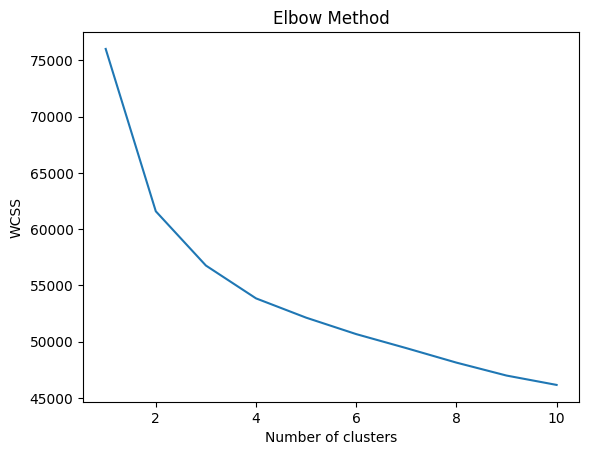

In [8]:
# Clustering using KMeans
# Determine the optimal number of clusters using elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [9]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

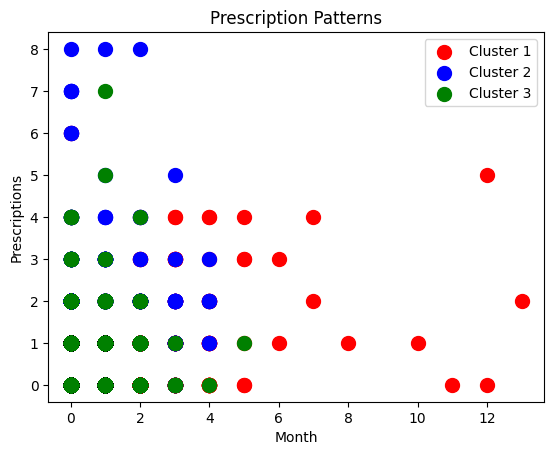

In [69]:
# Plot the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.title('Prescription Patterns')
plt.xlabel('Month')
plt.ylabel('Prescriptions')
plt.legend()
plt.show()

**Target Drug Prescription Patterns**

<Axes: xlabel='months', ylabel='Average prescription'>

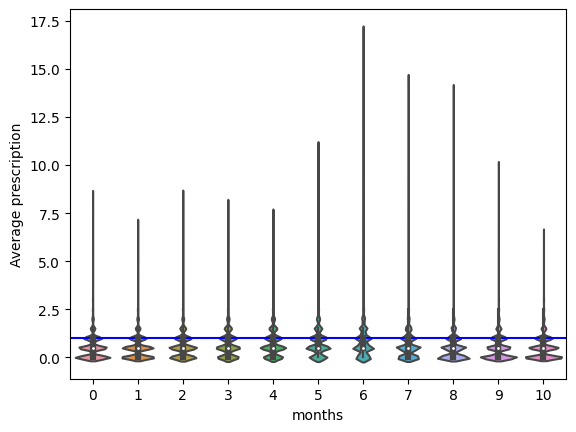

In [68]:
# Create an empty list to store the individual series
series_list = []

# Iterate through the range of columns
for i in range(0, len(df_pivot.columns) - 1):
    # Calculate the average of two sequential columns
    a = (df_pivot.iloc[:, i] + df_pivot.iloc[:, i+1]) / 2
   
    series_list.append(a)

# Combine the series into a single DataFrame
combined_df = pd.concat(series_list, axis=1)

# Plot the violin plot
plt.axhline(y=1, color='blue', linestyle='-')
plt.xlabel("months")
plt.ylabel("Average prescription")
sns.violinplot( data=combined_df)